In [1]:
import numpy as np
from skimage import color
import tensorflow as tf
import math

# Colour Palette Preprocessing

In [2]:
def rgb_from_hex(color_hex):
  # hex colours are R(0,1) G(2,3) B(4,5) in base 16
  return tuple(int(color_hex[i:i+2], 16) for i in (0,2,4))

In [3]:
def get_palette_from_string(palette_list):
  list = [rgb_from_hex(color[1:]) for color in palette_list]
  # Sort Colours by brightness (R+G+B roughly) (or else, Yellow Brown and Brown yellow are interpreted as different colours)
  return sort_tuple(list)

In [4]:
def sort_tuple(list_of_tuples):
    list_of_tuples.sort(key = lambda x: x[1]+x[0]+x[2]) 
    return list_of_tuples

In [5]:
def convert_palettes_to_lab(rgb_palettes):
  scaled_palettes = np.array([rgb_palettes]) / 255.0
  lab_palettes = color.rgb2lab(scaled_palettes)
  return lab_palettes.flatten()

In [6]:
def features_from_list_of_palettes(list_of_palettes):
  list_of_lists = []
  for palette_list in list_of_palettes:
    lab_palette = convert_palettes_to_lab(get_palette_from_string(palette_list))
    list_of_lists.append(lab_palette)

  
  X = np.array(list_of_lists)
  return X

In [7]:
list_of_palettes = [['#57473e', '#ad9a99', '#887471', '#211c14', '#cdcacb'], ['#c0b7b6', '#a59293', '#463d3b', '#796663', '#dfe1e4'], ['#9a8483', '#d1cdce', '#7a645c', '#b3a3a3', '#56443a'], ['#66534c', '#937f7f', '#c7bfbe', '#af9f9e', '#e2e3e6'], ['#d7d9dd', '#7a6764', '#c2b9ba', '#a49192', '#54453f'], ['#9d8988', '#806963', '#cfcfd4', '#594239', '#b6a9a7'], ['#c2b8b7', '#66544d', '#8d7978', '#aa9797', '#dadbe0'], ['#c2b6b2', '#4e3d35', '#d4d2d5', '#a38f90', '#796562'], ['#74645d', '#908482', '#d8d4d6', '#a89a99', '#beb2ae'], ['#bfb2b3', '#4c3b34', '#d9d6d9', '#9e898c', '#78645f'], ['#52443c', '#c4b8b5', '#a69292', '#7c6a66', '#dfdddf'], ['#8e7e7d', '#bdb5b5', '#675a51', '#d2d2d6', '#a99899'], ['#ac9898', '#c4bab9', '#65534d', '#8f7978', '#dadadc'], ['#5f4c44', '#877370', '#d9d6d8', '#a99596', '#c4b9b8'], ['#715e55', '#b3a3a1', '#9c8786', '#dbdcdf', '#c9c1c0'], ['#b1a1a1', '#75625b', '#978383', '#cdcacd', '#534137'], ['#d7d8dc', '#231d18', '#a28f90', '#c2b8b9', '#705e58'], ['#cfcbce', '#77635d', '#b1a1a0', '#53423a', '#958080'], ['#dcdee3', '#836f6a', '#a38e92', '#bfb3b3', '#5c4940'], ['#c7bcb9', '#886f67', '#a89493', '#e0dbdc', '#664f43'], ['#232122', '#bfb5b7', '#6b5854', '#d7d9e0', '#9d878b'], ['#c2baba', '#6c5852', '#ae9e9c', '#978382', '#dcdde2'], ['#725d59', '#cfcbce', '#b19f9f', '#3a322e', '#967e7f'], ['#433837', '#baacad', '#9f8a8c', '#d2d0d4', '#786461'], ['#d0d0d3', '#9c8887', '#796562', '#524038', '#b3a7a5'], ['#564842', '#d1cdd0', '#b7aead', '#9e8d90', '#786766'], ['#af9f9b', '#6f5a50', '#c7c1c0', '#94807b', '#dcdee1'], ['#ecc498', '#fdf9f4', '#f7d7b5', '#ddac7a', '#fdead6'], ['#83685f', '#d8d5d7', '#a58d8b', '#bfafac', '#594135'], ['#826d6b', '#59463f', '#a59294', '#dad9db', '#c3bab8'], ['#dedfe5', '#a79596', '#8a7878', '#65554e', '#c1b9ba'], ['#5e4b44', '#897372', '#aa9697', '#dad9dc', '#c4b9b8'], ['#09080a', '#584c4a', '#a4a4a9', '#c6c7cb', '#868184'], ['#060606', '#885e4e', '#1f1a1a', '#b88978', '#553a30'], ['#5b504d', '#cfcac2', '#7ea1a4', '#bba09d', '#060606'], ['#0b0b0c', '#6f5e5b', '#bab6b8', '#453733', '#908180'], ['#080808', '#e2d5d1', '#86797a', '#3d3636', '#c0ada8'], ['#242325', '#050506', '#d9b6a4', '#977568', '#111113'], ['#080809', '#615453', '#bf9f95', '#2b2729', '#ecd0c6'], ['#060606', '#c5bcb9', '#695f5d', '#3d3838', '#938885'], ['#0a0a0b', '#a79894', '#514a49', '#786b68', '#2f2d2e'], ['#383333', '#c9b3ad', '#f1efee', '#0b0b0b', '#877875'], ['#383433', '#c5b6b0', '#8a7a74', '#e2dad7', '#0a090a'], ['#070708', '#9b7870', '#e0b9ab', '#141317', '#4a3d3c'], ['#5f4842', '#050505', '#9c786d', '#deb9aa', '#1b191b'], ['#3e3e41', '#e0dfe3', '#bbb5bb', '#0b0b0c', '#87828a'], ['#0b090b', '#231e20', '#b48b80', '#e3c1b5', '#695551'], ['#3e3a3d', '#79564b', '#060606', '#b78b7d', '#232021'], ['#795749', '#0a0a0a', '#8e7a71', '#cb9279', '#413734'], ['#0c0c0c', '#80675e', '#edccbb', '#393639', '#c09b8c'], ['#534845', '#292526', '#7f6f6b', '#040404', '#c9a28f'], ['#222123', '#bf9788', '#050506', '#eccec0', '#5f514e'], ['#060606', '#272221', '#584844', '#ceac9d', '#977365'], ['#040404', '#9d6c56', '#252224', '#d4a081', '#4f3e39'], ['#121212', '#635758', '#070707', '#383232', '#aa8a81'], ['#6a5d5b', '#070607', '#848083', '#c8a290', '#3c3635'], ['#635755', '#c4aaa0', '#332f2e', '#060606', '#8d7d78'], ['#050505', '#2f2b2a', '#c2ab9b', '#e8e3dd', '#7b665c'], ['#080708', '#e8cdc4', '#b49890', '#292427', '#655a5a'], ['#070707', '#be907b', '#151414', '#3f3431', '#816052'], ['#060606', '#c39989', '#6e5850', '#1c1a1b', '#eccab9'], ['#0f0f0f', '#eae0db', '#d2b3a8', '#4e3f3c', '#9d7c73'], ['#37393c', '#060606', '#958f8e', '#5e6064', '#d8c1b3'], ['#040404', '#252325', '#e7c5b4', '#877068', '#101011'], ['#786662', '#be9f96', '#060606', '#ecd0c6', '#312e2f'], ['#cab29d', '#6b5c4f', '#59351d', '#988877', '#2b1a12'], ['#b4a79a', '#53301b', '#787065', '#f2d54c', '#79d01c'], ['#66523d', '#938b7f', '#2f1f16', '#e22e3b', '#e9d6ac'], ['#b0a494', '#3d2a1c', '#e7e6e7', '#77685a', '#6d3b1b'], ['#856553', '#673d24', '#392212', '#a39586', '#d0c3b5'], ['#d1c5bf', '#68422d', '#948579', '#331e12', '#ef4f68'], ['#7f786d', '#3e2210', '#d7d7d8', '#654630', '#aba498'], ['#784d30', '#817868', '#d7cab7', '#4c2914', '#ab9e8c'], ['#301c13', '#653f28', '#dcc29c', '#8f8476', '#ec2c40'], ['#767065', '#251613', '#5b3727', '#b5a494', '#c0612c'], ['#764524', '#352d23', '#928f82', '#566664', '#c8bcab'], ['#84593f', '#56331b', '#e49d2f', '#8e8c81', '#c6bbad'], ['#4f301a', '#727268', '#ab9f90', '#dbd3cc', '#825235'], ['#482e1c', '#9e9386', '#715a44', '#e9e9eb', '#e2ae3d'], ['#472f27', '#da1940', '#858276', '#beb2a1', '#07ae91'], ['#b2a596', '#6a4329', '#322115', '#7b766a', '#d7dbdf'], ['#6b4026', '#9d968a', '#77675a', '#291f18', '#cac0b2'], ['#c6b9ae', '#c4032a', '#3e2415', '#6d4c37', '#8c8377'], ['#6e675c', '#c6bfb7', '#372314', '#9a8f7f', '#693f22'], ['#847569', '#412513', '#b7a498', '#6c442b', '#decccf'], ['#76513b', '#de9b4f', '#8e8477', '#c8b4a4', '#4f2d15'], ['#8e8677', '#472714', '#6c4834', '#c9b9a8', '#d9452c'], ['#8f8779', '#c7d9e7', '#3e2a1d', '#6e5948', '#afb1ae'], ['#897f71', '#492e18', '#bfb2a3', '#794b31', '#f2c53f'], ['#1e1814', '#8f735e', '#d9ccbf', '#b0a596', '#6c4126'], ['#695749', '#4d2e19', '#94633d', '#d2c3b2', '#9e9485']]
print(len(list_of_palettes))
# Contains Fendi (mostly light brown) and Azarro (mostly black)

91


In [8]:
X = features_from_list_of_palettes(list_of_palettes)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# print(X)

# Dimensionality Reduction


In [10]:
def scatter(X):
  import matplotlib.pyplot as plt
  fig = plt.figure(figsize = (16, 9))
  plt.scatter(X[:,0], X[:,1], c=colors)

# Red for Fendi, Blue for Azarro, Purple for Pyer Moss
colors1 = ['#ff0000']*32
colors2 = ['#0000ff']*33
colors3 = ['#880088']*26
colors = colors1+colors2+colors3
print(colors)

['#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#0000ff', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088', '#880088'

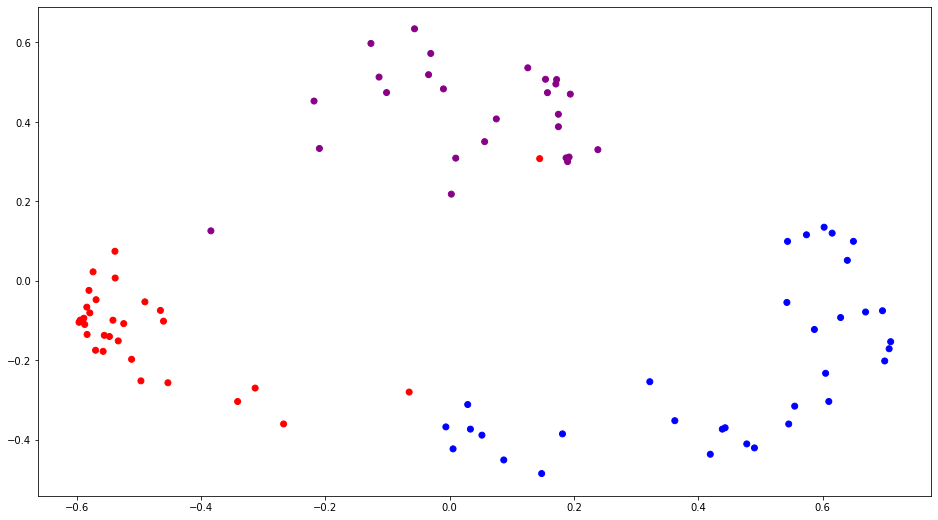

In [14]:
#Kernel PCA
from sklearn.decomposition import KernelPCA

X_2 = KernelPCA(n_components = 2, kernel = 'rbf').fit_transform(X)
scatter(X_2)